Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from typing import Literal

In [89]:
def getSymbolReport(symbol:str) -> str:
    """
    Get required financial report for the desired symbol.
    symbol: Symbol
    """
    ticker = yf.Ticker(symbol)

    def getCompanyInfo(ticker:yf.Ticker) -> str:
        info_dict = ticker.get_info()
        sel_fields = ['longName','website','sector','industry','longBusinessSummary','fullTimeEmployees','companyOfficers']
        s = f"## **{info_dict['longName']}**<br>\n"
        for field in sel_fields:
            if field == 'longBusinessSummary':
                s += f"\n### **Business Summary**<br>\n{info_dict[field]}"
                continue
            elif field == 'fullTimeEmployees':
                s += "\n### **Employee Details**<br>\n"
            elif field == 'companyOfficers':
                s += 'majorEmployees:<br>\n'
                for officer in info_dict['companyOfficers']:
                    s += f"- {officer['name']}: {officer['title']}<br>\n"
                continue
            s += f"{field}: " + str(info_dict[field]) + "<br>\n"
        return s
    
    def getCompanyNews(ticker:yf.Ticker) -> str:
        news_list = ticker.get_news()
        sel_fields = ['title','link','publisher']
        s = f"### **Recent Company News**<br>\n"
        for news in news_list:
            for field in sel_fields:
                s += f"{field}: " + f"{news[field]}<br>\n"
            s += "<br>\n"
        return s
    
    def getInvestorData(ticker:yf.Ticker) -> str:
        df1 = ticker.get_institutional_holders()
        df2 = ticker.get_mutualfund_holders()

        # Institutional Holders and Percentage Holding
        plt.figure()
        plt.title('Institutional Holders and Percentage Holding')
        plt.pie(df1['Shares'],normalize=True,labels=df1['Holder'])
        plt.pie(df1['Shares'],normalize=True,labels=round((df1['Shares']/df1['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
        plt.savefig('./ReportMedia/Institutional Holders and Percentage Holding.png')
        
        # Mutual Fund Holders and Percentage Holding
        plt.figure()
        plt.title('Mutual Fund Holders and Percentage Holding')
        plt.pie(df2['Shares'],normalize=True,labels=df2['Holder'])
        plt.pie(df2['Shares'],normalize=True,labels=round((df2['Shares']/df2['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
        plt.savefig('./ReportMedia/Mutual Fund Holders and Percentage Holding.png')

        s = "### **Investor Data**<br>\n![Institutional Holders and Percentage Holding](/ReportMedia/Institutional Holders and Percentage Holding.png 'T1')<br>\n![Mutual Fund Holders and Percentage Holding](/ReportMedia/Mutual Fund Holders and Percentage Holding.png 'T2')<br>\n"
        return s
    
    return getCompanyInfo(ticker = ticker) + getCompanyNews(ticker = ticker) + getInvestorData(ticker = ticker)

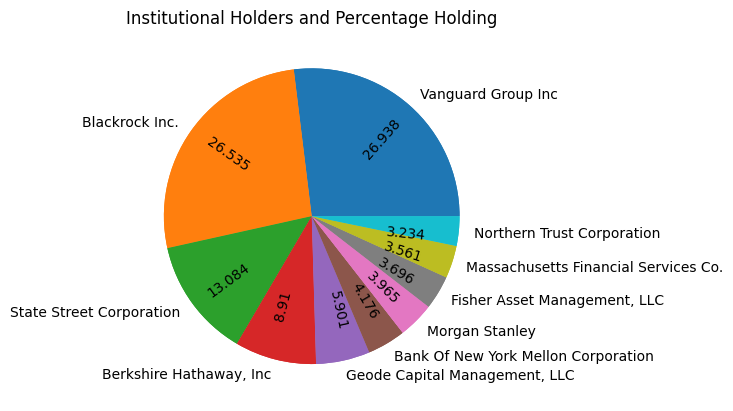

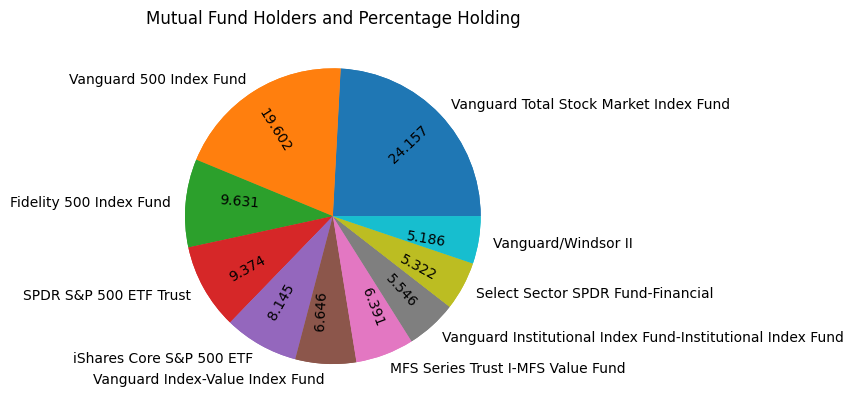

In [90]:
with open('Report.md','w') as file:
    file.write(getSymbolReport('C'))
file.close()

## **Citigroup Inc.**<br>
longName: Citigroup Inc.<br>
website: https://www.citigroup.com<br>
sector: Financial Services<br>
industry: Banks - Diversified<br>

### **Business Summary**<br>
Citigroup Inc., a diversified financial services holding company, provides various financial products and services to consumers, corporations, governments, and institutions in North America, Latin America, Asia, Europe, the Middle East, and Africa. It operates through three segments: Institutional Clients Group (ICG), Personal Banking and Wealth Management (PBWM), and Legacy Franchises. The ICG segment offers wholesale banking products and services, including fixed income and equity sales and trading, foreign exchange, prime brokerage, derivative, equity and fixed income research, corporate lending, investment banking and advisory, private banking, cash management, trade finance, and securities services to corporate, institutional, and public sector clients. The PBWM segment offers traditional banking services to retail and small business customers through retail banking, cash, rewards, value portfolios, and co-branded cards. It also provides various banking, credit cards, custody, trust, mortgages, home equity, small business, and personal consumer loans. The Legacy Franchises segment provides traditional retail banking and branded card products to retail and small business customers. The company was founded in 1812 and is headquartered in New York, New York.
### **Employee Details**<br>
fullTimeEmployees: 239<br>
majorEmployees:<br>
- Ms. Jane Nind Fraser: CEO & Director<br>
- Mr. Mark A.L. Mason: Chief Financial Officer<br>
- Mr. Anand  Selvakesari: Chief Operating Officer<br>
- Mr. Paco  Ybarra: Senior Advisor<br>
- Mr. Peter  Babej: Interim Head of Banking<br>
- Mr. David R. Bailin: Chief Investment Officer & Global Head of Investments<br>
- Mr. Johnbull E. Okpara: Chief Accounting Officer & Controller<br>
- Mr. Michael  Whitaker: Head of Operations & Technology<br>
- Ms. Jennifer  Landis: Head of Investor Relations<br>
- Mr. Brent J. McIntosh: Chief Legal Officer & Corporate Secretary<br>
### **Recent Company News**<br>
title: Biden suspends gas exports: Will this impact producers?<br>
link: https://finance.yahoo.com/video/biden-suspends-gas-exports-impact-224219680.html<br>
publisher: Yahoo Finance Video<br>
<br>
title: Goldman Sachs Exited 2023 With A Q4 Win But Like Morgan Stanley, Its Annual Figures Lacked Luster<br>
link: https://finance.yahoo.com/news/goldman-sachs-exited-2023-q4-174448602.html<br>
publisher: Benzinga<br>
<br>
title: Layoffs in 2024: A List of Companies Cutting Jobs This Year<br>
link: https://finance.yahoo.com/m/604dffb9-56b6-3a7f-aa11-739677c15b28/layoffs-in-2024%3A-a-list-of.html<br>
publisher: The Wall Street Journal<br>
<br>
title: Cheaper Gas Prices Won�t Last Much Longer<br>
link: https://finance.yahoo.com/m/d5337d3e-4cb7-3a14-b0a2-fa972b5ef972/cheaper-gas-prices-won%E2%80%99t-last.html<br>
publisher: Barrons.com<br>
<br>
title: Exclusive-Russia struggles to sell Pacific oil, 14 tankers stuck - sources, data<br>
link: https://finance.yahoo.com/news/exclusive-russia-struggles-sell-pacific-141422352.html<br>
publisher: Reuters<br>
<br>
title: American Express CEO on earnings report card: We will perform in a slowing economy<br>
link: https://finance.yahoo.com/news/american-express-ceo-on-earnings-report-card-we-will-perform-in-a-slowing-economy-134120063.html<br>
publisher: Yahoo Finance<br>
<br>
title: Ex-UBS, Citi Muni Bankers Hired by Rivals Eyeing Bond-Sales Revival<br>
link: https://finance.yahoo.com/news/ex-ubs-citi-muni-bankers-120000696.html<br>
publisher: Bloomberg<br>
<br>
title: MORNING BID AMERICAS-PCE in our time as US economy impresses<br>
link: https://finance.yahoo.com/news/morning-bid-americas-pce-time-110000371.html<br>
publisher: Reuters<br>
<br>
### **Investor Data**<br>
![Institutional Holders and Percentage Holding](/ReportMedia/Institutional Holders and Percentage Holding.png 'T1')<br>
![Mutual Fund Holders and Percentage Holding](/ReportMedia/Mutual Fund Holders and Percentage Holding.png 'T2')<br>
